In [201]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [202]:
df = pd.read_csv('./iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
labels = df[[4]].copy()
X = df.drop(4, axis=1)

In [204]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(labels).toarray()

In [205]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [206]:
X = tf.constant(X)
y = tf.constant(y)

In [207]:
def relu(z):
    return tf.math.maximum(0, z)

In [208]:
def linear(W, X, b):
    return (X @ W) + b

In [209]:
def softmax(z):
    temp = tf.math.exp(z)
    return (temp / tf.reduce_sum(temp, axis=1, keepdims=True))

In [210]:
def compute_loss(y_hat, y):
    return - (tf.reduce_mean(y * tf.math.log(y_hat)))

In [211]:
W0 = tf.Variable(np.random.rand(4, 50)*0.1)
W1 = tf.Variable(np.random.rand(50, 100)*0.1)
W2 = tf.Variable(np.random.rand(100, 3)*0.1)
b0 = tf.Variable(np.zeros(50))
b1 = tf.Variable(np.zeros(100))
b2 = tf.Variable(np.zeros(3))

In [212]:
learning_rate = 1e-2
epochs = 10000

In [213]:
losses = []
for _ in tqdm(range(epochs)):
    with tf.GradientTape() as tape:
        tape.watch([W0, b0, W1, b1, W2, b2])
        h1 = relu(linear(W0, X, b0))
        h2 = relu(linear(W1, h1, b1))
        y_hat = softmax(linear(W2, h2, b2))
        loss = compute_loss(y_hat, y)

    grad = tape.gradient(loss, {
        "W0" : W0,
        "b0" : b0,
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
    })
    W0 = W0 - learning_rate * grad['W0']
    W1 = W1 - learning_rate * grad['W1']
    W2 = W2 - learning_rate * grad['W2']
    b0 = b0 - learning_rate * grad['b0']
    b1 = b1 - learning_rate * grad['b1']
    b2 = b2 - learning_rate * grad['b2']
    losses.append(loss)

100%|██████████| 10000/10000 [01:54<00:00, 87.07it/s]


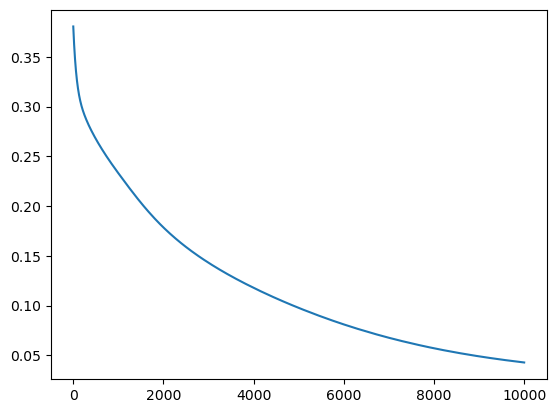

In [214]:
plt.plot(losses)
plt.show()

In [215]:
h1 = relu(linear(W0, X, b0))
h2 = relu(linear(W1, h1, b1))
y_hat = softmax(linear(W2, h2, b2))

np.array(tf.argmax(y_hat, axis=1) == tf.argmax(y, axis=1)).sum() / len(y_hat)

0.9733333333333334